# 🟦 Square Transformer ($y = x^2$)

In the **Tukey’s Ladder of Powers**, the Square Transformer sits at $\lambda = 2$. It is a power transformation used to reduce left skewness by disproportionately increasing the magnitude of larger values.

---

### 1. How it Works: "The Right-Side Stretch"
The square function ($y = x^2$) is non-linear. As $x$ increases, the output $y$ increases at an accelerating rate.

* **Small Values (0 to 1):** These values actually get smaller or stay relatively small (e.g., $0.5^2 = 0.25$).
* **Large Values (> 1):** These values are pushed significantly further to the right (e.g., $10^2 = 100$).
* **Result:** If your data has a "clump" on the right and a long tail on the left, squaring the data pulls that clump further right, evening out the distribution.



---

### 2. When to Use the Square Transformer

#### A. Left-Skewed Data (Negative Skew)
Left-skewed data is less common in nature than right-skewed data, but it occurs in specific scenarios:
* **Test Scores:** In an easy exam, most students score high (80-90%), with a few very low scores (the left tail).
* **Age of Death:** In developed countries, most people die at an older age, creating a long tail of younger ages.
* **Asset Retirement:** The age at which machinery or electronics fail often has a left skew (most last until the expected lifespan).



#### B. Feature Engineering
Even if your data isn't skewed, squaring a feature is a common technique in **Polynomial Regression** to capture non-linear relationships (e.g., the relationship between "Area" and "Price" of a house).

---

### 3. Comparison: Square vs. Log/Square Root

| Transformation | Power ($\lambda$) | Best for... | Effect on Tail |
| :--- | :--- | :--- | :--- |
| **Square ($x^2$)** | $2$ | **Left Skew** | Stretches the Right tail |
| **Identity ($x$)** | $1$ | No skew | No change |
| **Square Root ($\sqrt{x}$)** | $0.5$ | Mild Right Skew | Compresses the Right tail |
| **Log ($\ln x$)** | $0$ | Strong Right Skew | Strongly compresses Right tail |



---

### 4. Critical Warnings ⚠️

* **Negative Values:** If your data contains negative numbers, squaring it will destroy the order (e.g., $-10$ and $10$ both become $100$). **Always ensure your data is positive** before squaring, or shift the data by adding a constant.
* **Magnitude Explosion:** Squaring values can lead to very large numbers (e.g., $1,000 \rightarrow 1,000,000$). This can make models like KNN or Gradient Descent unstable. You almost always need to **Scale/Standardize** your data *after* squaring it.
* **Interpretability:** A 1-unit increase in $x^2$ is not the same as a 1-unit increase in $x$.

---

### 5. 🐍 Python Implementation


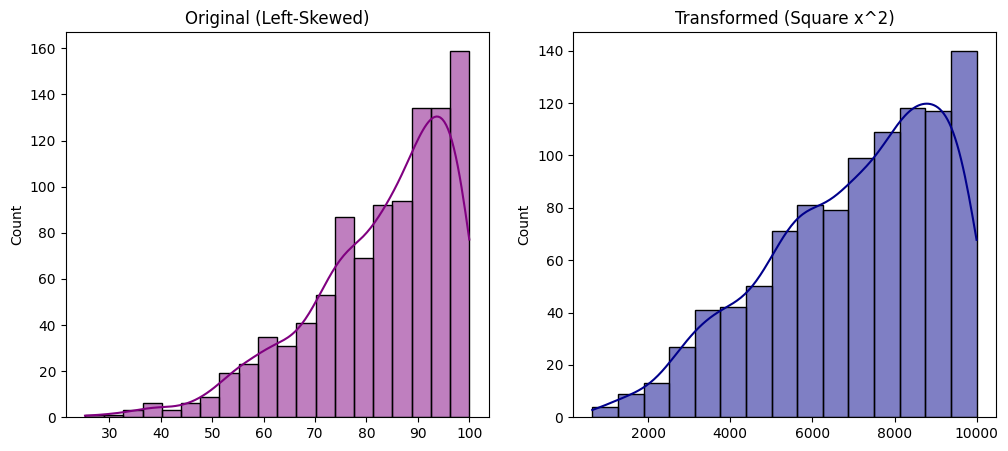

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate Left-Skewed Data (using Beta distribution)
data = np.random.beta(a=5, b=1, size=1000) * 100

# 2. Apply Square Transformation
data_squared = np.square(data)

# 3. Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data, kde=True, ax=ax1, color='purple')
ax1.set_title("Original (Left-Skewed)")

sns.histplot(data_squared, kde=True, ax=ax2, color='darkblue')
ax2.set_title("Transformed (Square x^2)")

plt.show()